#checking 

In [4]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [5]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [6]:
#high res DC clustering --> 'leiden_DC_v2' on NRdata_pre-hvg.h5ad 
#high res mac clustering --> 'leiden_M' on NRdata_pre-hvg.h5ad

#read in pre-hvg
pre_hvg_data = sc.read_h5ad("NRdata_pre-hvg.h5ad") # this should already be normalised and log transformed

In [7]:
pre_hvg_data

AnnData object with n_obs × n_vars = 623908 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'clean-subcluster-v2'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

In [8]:
colour_vars = ["leiden_DC_v2","leiden_M"]

In [9]:
#plotting 
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(pre_hvg_data, color=colour_vars, ncols=2, size=5)

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

## Load in high clustered DC object, overlay DC3 sig

``` bash
rsync -azvhp /QRISdata/Q5935/nikita/scdata/Python_Objects_Backup_20241115/NR_dc_clustered2.h5ad /scratch/user/s4436039/scdata/Myeloid_Objects/
```

In [11]:
# load 'NR_dc_clustered2.h5ad'
dc_data2 = sc.read_h5ad("NR_dc_clustered2.h5ad")

In [12]:
dc_data2

AnnData object with n_obs × n_vars = 51356 × 1561
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'subcluster_14', 'DC_labels_v1', 'YS_score', 'HSC_score', 'CD5nDC2_up_vDC3_score', 'DC3_up_vCD5nDC2_score', 'CD5pDC2_up_vDC3_score', 'DC3_up_vCD5pDC2_score', 'DC3_up_vMono_score', 'Mono_up_vDC3_score'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'st

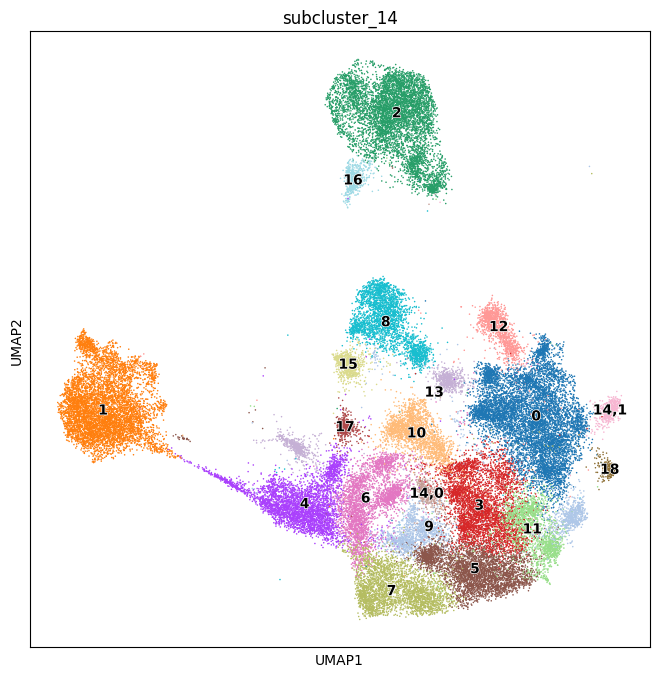

In [13]:
#plotting clusters
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(dc_data2, color="subcluster_14", legend_loc="on data", legend_fontoutline=1, size=5)

### Overlay DC3 score

In [ ]:
#define DC subset gene sets from Villani et al 
DC1_sig = ['CLEC9A','C1ORF54','HLA-DPA1','CADM1','CAMK2D','CPVL','HLA-DPB2','WDFY4','CPNE3','IDO1','HLA-DPB1','LOC645638','HLA-DOB','HLA-DQB1','HLA-DQB','CLNK','CSRP1','SNX3','ZNF366','KIAA1598','NDRG2','ENPP1','RGS10','AX747832','CYB5R3','ID2','XCR1','FAM190A','ASAP1','SLAMF8','CD59','DHRS3','GCET2','FNBP1','TMEM14A','NET1','BTLA','BCL6','FLT3','ADAM28','SLAMF7','BATF3','LGALS2','VAC14','PPA1','APOL3','C1ORF21','CCND1','ANPEP','ELOVL5','NCALD','ACTN1','PIK3CB','HAVCR2','GYPC','TLR10','ASB2','KIF16B','LRRC18','DST','DENND1B','DNASE1L3','SLC24A4','VAV3','THBD','NAV1','GSTM4','TRERF1','B3GNT7','LACC1','LMNA','PTK2','IDO2','MTERFD3','CD93','DPP4','SLC9A9','FCRL6','PDLIM7','CYP2E1','PDE4DIP','LIMA1','CTTNBP2NL','PPM1M','OSBPL3','PLCD1','CD38','EHD4','ACSS2','LOC541471','FUCA1','SNX22','APOL1','DUSP10','FAM160A2','INF2','DUSP2','PALM2','RAB11FIP4','DSE','FAM135A','KCNK6','PPM1H','PAFAH1B3','PDLIM1','TGM2','SCARF1','CD40','STX3','WHAMMP3','PRELID2','PQLC2']
DC2_sig = ['CD1C','FCER1A','CLEC10A','ADAM8','CD1D','FCGR2B','CLEC4A','SLC2A3','CD33','ETS2','CLIC2','PEA15','CACNA2D3','CD1E','MBOAT7','C10ORF128','NR4A2','AGPAT9','ENTPD1','CD2','PER1','PID1','AREG','PTGS1','SMA','CLEC17A','ITGA5','CREB5','PTAFR','NOD2','CCR6']
DC3_sig = ['S100A9','S100A8','VCAN','LYZ','ANXA1','PLBD1','RNASE2','FCER1A','SLC2A3','CD163','CSF3R','MNDA','CD14','NAIP','CSTA','FCN1','CD1D','FPR1','F13A1','CLEC10A','CES1','PID1','S100A12','MTMR11','SMA','LAT2','RETN','TMEM173','AOAH','RAB3D','CD36','MGST1','TREM1','HNMT','CES1P1','ADAM15','IL13RA1','MICAL2','ITGA5','CREB5','IL1B','NR4A2','MPP7','PTAFR','HBEGF','NFE2','ASGR1','BST1','IL1RN','NOD2','NLRP3','DQ575504','LMNA','C9ORF89','IL27RA','NLRP12','RAB27A','EREG','LOC284454']

#mregDC sig from Merad
mregDC_sig = ['CD40','CD80','CD86','RELB','CD83','CD274','PDCD1LG2','CD200','FAS','ALDH1A2','SOCS1','SOCS2','CCR7','MYO1G','CXCL16','ADAM8','ICAM1','FSCN1','MARCKS','MARCKSL1','IL4RA','IL4I1','CCL17','CCL22','TNFRSF4','STAT6','BCL2L1']

Dute_DC3_sig

In [15]:
# Define dictionary of gene sets
gene_sets = {
    "DC1_sig": DC1_sig,
    "DC2_sig": DC2_sig,
    "DC3_sig": DC3_sig,
    "mregDC_sig": mregDC_sig,
}

In [16]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(dc_data2, genes, score_name=name)

       'FAM190A', 'GCET2', 'C1ORF21', 'LRRC18', 'MTERFD3', 'LOC541471',
       'PALM2', 'WHAMMP3', 'PQLC2'],
      dtype='object')


In [17]:
colour_vars = ["DC1_sig","DC2_sig","DC3_sig","mregDC_sig","subcluster_14"]

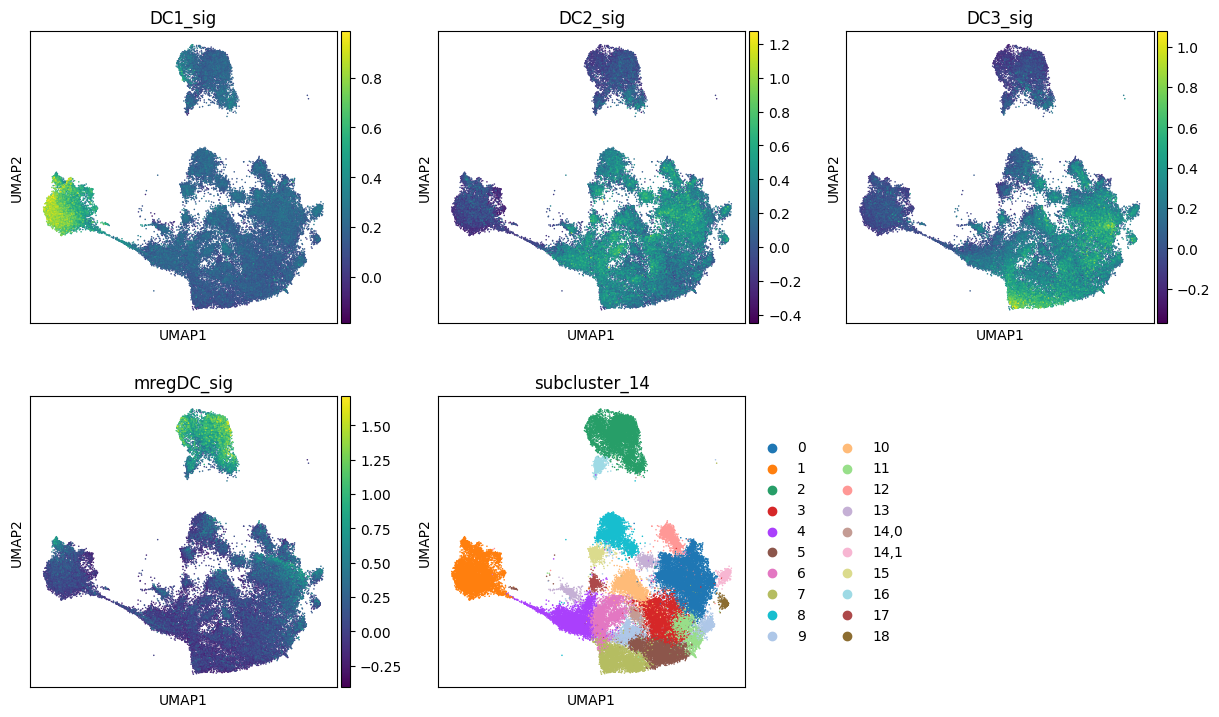

In [18]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(dc_data2, color=colour_vars, ncols=3, size=5)

In [19]:
#define gene sets
CD5pDC2_up_vDC3 = ['BDKRB2','LAD1','CLNK','NCCRP1','GLDN','CLEC4C','CD5','WFDC21P','ATP1A2','DPP4','LAG3','CXCR3','GTF2IRD1','BCL2L14','SIGLEC6','CARD11','CCL19','PPP1R14A','SLC4A9','COL19A1','LAMP3','DAPK2','RAB30','SEPT3','CYP2E1','BTLA','KCNK17','CDH17','KIT','TRPC6','EHF','LILRA4','CARMIL2','PLEKHG1','TTC26','CD200','RP11-83C7.1','IDO1','DUSP4','GIPR','FCRL6','RP11-1348G14.6','ABLIM1','ZEB1','CNR2','IDO2','SEMA4C','ZEB1-AS1','CD207','IGHD','PLS3','THSD1','RHCE','ZNF726','CTD-2236F14.1','CLIC3','SEPT1','FAM167A','LRTM1','RP11-318A15.2','C1orf115','GALNTL6','CNN3','IL9RP3','HLA-DOB','TLR3','SLCO5A1','CDH1','P2RY10','APOC1','IFNLR1','TOX2','TPX2','NCKAP5','LINC00923','PTK7','RHOXF1-AS1','ZNF114','SH2D3A','DNASE1L3','ADAMTS2','AC023590.1','AKAP6','CYP4F3','CCR7','LINC01819','MSLN','SLC22A23','TMEM121','RASAL1','IL18RAP','FAM57A','NPIPB6','OBSL1','RANBP17','SLC4A3','GPR171','CTD-2319I12.2','LTB','SLC12A3','ABTB2','HOPX','RPS6KL1','P2RY14','FAM46C','TRABD2A','HIC1','SLAMF7','IGHEP2','TLR10','ARHGAP22','AC013474.4','CTC-450M9.1','RP11-890B15.3','RP11-166B2.3','CTLA4','JADE3','QRICH2','SCN9A','IL18R1','CIB2','ANK3','STON2','AC018755.16','TBC1D29','DNAI2','CENPF','ALPK3','BIK','IRF4','SEMA7A','LINC02182','RP11-356J5.12','RP11-112J3.16','AUTS2','TRIM45','MED12L','DUOX1','MTERF2','TNFRSF25','YPEL1','TCEA3','SPOCK2','ILDR2','AXL','RAMP1','STX18-AS1','TRIB2','KIRREL3','RP11-63K6.1','PPM1J','RNA5SP465','ZNF542P','CNFN','WHAMMP3','KIFC1','KLF5','CD200R1','CYFIP2','MCOLN2','ADAM19','TTLL9','BEND5']
DC3_up_vCD5pDC2 = ['PILRA','WDR17','NRGN','OLR1','SIGLEC11','CEBPB','PIK3IP1','CD300E','ASGR1','PTX3','NKG7','IER3','MEI1','MLKL','CAMK2D','STS','DUSP6','RIMKLB','CSF1R','SLC7A7','ABCC3','CD36','TBC1D30','PTGER2','MYC','HNMT','ARHGEF10L','RHOBTB3','ELL2','RFX2','LAMB2','FXYD6','PLCD3','CHST13','CCDC151','MGST1','C5orf58','SNX21','RAB44','NFE2','TGFA','RAB13','TESC','IKBKE','QPCT','LDLR','RIN2','LINC01431','FAM213A','EREG','RP11-107E5.4','RGL1','HP','NHS','TMEM53','C1orf228','F8','FKBP9','GIMAP7','SPR','MITF','TRAIP','ZHX3','SEPT8','FAM92A','TCN2','CACNA2D4','TFEC','CLIP4','CTD-2589M5.5','GPR27','VSIG2','NID1','HK3','CACNB3','AC091814.2','RAB3D','DOC2A','TMC4','TRNP1','ADM','PYGL','MMP17','LINC01226','COPZ2','LONRF3','OSM','PPFIBP1','IFI27','ID1','MT1E','C9orf106','FCER2','BMP2','CFD','LDLRAD3','TMEM106B','RP11-324E6.6','PLPPR2','CDC42EP1','RASL10A','SNTB1','PID1','TMEM255B','SIGLEC15','RP5-1107A17.4','GIMAP1','ST6GALNAC3','RP11-597D13.9','NRP1','SLC22A16','PLPP7','MN1','SLC22A4','SLC22A15','CD9','PTPN13','NLRP12','PTGR1','TNS1','CD209','HACD1','SMAD6','DAGLA','ST3GAL5-AS1','C5AR1','NCR3LG1','MCEMP1','FAR2','RP11-463O12.5','TREM1','OLFML3','PLD1','LAMP1','AIM2','STARD13','LBX2-AS1','CTC-510F12.4','RP4-737E23.5','OPHN1','LPAR1','BST1','DMXL2','SLED1','SOCS2','SDC4','GIMAP4','LINC01140','RP11-351I24.1','AC091814.3','CES1P1','FBN2','CLMN','SDC3','SEMA4F','FOXP4','RBP7','SEPSECS-AS1','MTMR11','NECTIN4','RUSC2','CCL2','APOBEC3A','PRKCDBP','RP11-521C22.2','TMOD2','ASB9','CXCL3','FAM198B','EPDR1','KLHDC8B','C1QA','CCDC136','VSIG4','RP11-84C10.2','VPS37B','ALOX15B','P4HA2','CES1','TDRD9','GPNMB','ADAMTS10','ANKRD22','CRISPLD2','DLGAP1-AS2','PLCB1','HAL','CRIP2','ARAP3','FCN2','TMEM176A','S100A12','DSC2','KCNN4','PVT1','RP11-84G21.1','CD163L1','STAB1','TMTC1','FCGR3A','SIGLEC12','THBS1','CRACR2B','CYP27A1','RP11-344B5.2','RNASE3','PLA2G7','FCGR1A','AK4','FFAR4','GGT5','LINC00937','S100A9','CXCR2P1','CTDSPL','KCNE1','PTPRH','CATSPER1','F13A1','KIF3C','CD163','RP11-44F14.1','PTGER3','ST8SIA6','MLC1','MAFB','ADRB1','DOK3','FCGR1B','CLTCL1','C1QC','NRG1','VCAN','TMEM176B','SERPINB2','OLFM1','F5','HPSE','LINC01506','CMKLR1','CCDC149','FCN1','TREML3P','CD14','TNNT1','CLEC6A','SLC11A1','RP1-122P22.2','RPL7AP64','FAM151B','ACOX2','SHROOM1','CDA','RNASE2','CXCL10','RP11-362F19.1','SERINC2','RP11-305L7.7','CLEC4D','FOLR2','MT1F','RP11-544M22.8','RP1-229K20.5','TMEM150B','SMPDL3A','RNASE1','PTGES','S100A8','EPHB2','LRP3','GIMAP8','CLEC4E','C5AR2','TXNRD3','GLT1D1','FOLR3','CKAP4']
DC3_up_vMono = ['FKTN','MDK','C12orf45','LRRCC1','RHOC','SMYD5','MUC12','FABP5P7','TNFRSF21','SELENBP1','AF131216.6','BORCS5','NRSN2','ZNF585A','ORC6','ZNF630','ADRB1','CD59','CELA2B','ATF7IP2','SCN9A','CAD','NET1','MKL2','PEBP1','CIITA','TSPOAP1','CEP128','REEP6','DNM1','PROC','CCND2','TMEM67','PADI6','ABHD15','SEPT11','LINC01315','TOMM34','ZIK1','MAP3K6','LINC01431','CYP2U1','IQCJ-SCHIP1','EFNB1','ZNF248','MS4A4E','SGCA','TTC27','RP11-514P8.10','DNAJB5','BANK1','PRKAR2B','ZNF582','FOXP1-IT1','CDK18','NKG7','ARL4D','PRKACB','ZBTB46','ALDH18A1','AIG1','LINC00665','ADGRL1','GAMT','RP11-162G10.5','PLEKHA5','MAP7','PCNX2','CCNE1','NIPSNAP3B','SOX12','CHST10','RGS1','ABCC4','RGAG4','FMN1','PON2','PCED1B-AS1','ZEB1','AF064858.11','HLA-DPB1','MPP3','PDE2A','ATP5F1P1','CEP41','STMN1','IQGAP3','HAPLN3','ZNF790-AS1','ACSF2','RP11-465B22.3','ZNF469','CMTM8','SUV39H2','HIST1H2AG','DENND5B','GFRA2','MYO5C','IL21R','DST','SEPT7P9','SRGAP3','SLC25A15','KLRG1','GHRL','RP11-53B2.4','HLTF','CD72','LDLRAD4-AS1','RP11-464F9.20','RPL21P5','CABLES1','CLEC17A','TTC8','ZNF138','RP11-635N19.1','SEMA7A','TNFRSF25','COL9A2','MICAL3','MCM2','GPRIN3','PPP1R16A','TCEAL1','WNT2B','TXNRD3','TCTN3','TRPC2','TSPAN33','SORBS3','RP11-705C15.3','KLHL3','ROBO1','FABP5','CHCHD6','SEL1L3','VSIG4','PTGFRN','CTB-50L17.16','RP11-28G8.1','RP11-75C10.6','FADS2','TNNT3','BMP2','GPA33','TSPYL5','UHRF1','EXPH5','GUCY1B3','EPB41L2','EMP1','RP11-231E4.5','PTTG1','CD226','TRAF5','BMS1P1','FGF9','CCL28','DFNA5','FKBP7','BICC1','ADAT2','GOLGA8A','ANKH','UPK3A','TLR10','PCED1B','OSGEPL1','GSTM2','HLA-DQB2','SPATS2L','EMILIN1','SACS','MAGEF1','RPS6KA2','SCML2','MTHFD1L','RP11-277P12.20','ITGB5','RAB39B','AP1S3','ACOT2','LY9','BATF3','CCL22','SMOX','USP13','ADGRG5','RP11-351C21.2','RP11-426C22.4','E2F5','ESR1','FAM69A','ADGRE4P','NRARP','TMEM97','KLF12','CTD-2373N4.5','TWNK','KLRF1','ASB2','TVP23A','C5orf63','SLAMF8','OCIAD2','GRAMD1C','ALDH7A1','BACH2','NEGR1','ST3GAL4-AS1','RP6-91H8.3','MBNL1-AS1','LGMN','BIN1','TRIB2','CD5','ZNF10','PHGDH','KDELC2','RP11-12G12.7','SEZ6L','PPM1J','CTTNBP2NL','PLEK2','CD109','ZNF256','METTL7B','HLA-DQA2','CD180','RAVER2','ATP10A','ZNF543','GATM','SLFNL1','CD69','KLF8','HLA-DQA1','MAP4K1','ASB9','GOLGA8B','HBB','KIF18A','TMEM237','PIK3C2B','MN1','CST7','FPR3','PRKCDBP','CDR2L','DNASE1L3','GNAI1','GFI1','LINC00299','CYP2S1','RYR1','SLC41A2','BMP6','RHOBTB1','DZIP1L','FCRLB','TMEM156','AREG','SLC30A4','TRABD2A','DOC2A','ZNF823','CLECL1','PXDC1','ITGB7','MOCOS','RP11-446N19.1','SLC35F3','RP3-460G2.2','DLGAP1-AS3','BCL2','SCN1B','FAM160A1','ITPRIPL1','RP3-522P13.3','NMB','SPIB','ACOT11','MORC4','FSCN1','BCAR3','BLNK','FAM161A','RP3-522P13.2','DHRS3','FCGR2B','RP11-834C11.4','LIMA1','A2M','CTD-2553L13.9','LRP1B','NAPSB','CTSV','TOP2A','PDLIM1','MYEF2','CCDC113','GEM','BIVM','RP11-542H15.1','PLEKHA6','ZNF154','IDO2','PEBP1P2','IFI27','SLC9A7','ZSCAN18','THEM4','CTB-102L5.7','ZNF366','SDS','HACD1','FAM81A','C1QA','RP11-338C15.3','C10orf128','GAS6','HOMER2','NDN','FAM46C','SNX7','ZFP30','SRGAP3-AS3','DUSP4','ZNF571','HELLS','ME3','PTPN13','NCALD','SPNS3','SEMA4F','AHNAK2','SLC2A1','TUSC1','LAMP5','HOXB-AS1','RP11-191A15.2','RP3-467N11.1','P2RY14','DOCK1','SERPINF1','IRF4','RP4-758J18.13','ADAM28','ACOT7','TENM4','CCDC136','IL1R2','DTNA','ROBO3','P2RY6','NAV1','ZNF571-AS1','GUCY1A3','SLAMF9','TPD52','PARP15','RUNDC3A','HOXA9','TMEM14A','CDS1','LINC01537','HSPG2','SH3BP4','RP11-863P13.4','SOCS2','CTD-2195B23.3','TMEM204','CSNK1G2P1','ZNF17','LHFP','ZNF660','ACVRL1','DNAI2','TMEM231','PLXNA1','BEND5','ZNF826P','PGAM1P7','UNC13B','CEP126','LINC01140','ZNF470','MAMSTR','HLA-DOA','RP11-413E1.4','GPR146','S100B','ADORA1','LMCD1','ALOX15','ID3','FLT3','TSPAN15','ZNF347','ZNF599','BAG2','C11orf63','AUTS2','CRIP3','RP11-356M20.1','TYRO3','CTSW','SCHIP1','STKLD1','CCDC26','ST8SIA6','AK5','H2AFY2','LINC01684','LMNA','PLD4','TESPA1','CEP112','RNASE1','CLIC2','PPP1R14A','ABCB4','KIF17','ST18','PTGDR2','FCGBP','RP11-219B4.3','ITM2C','SEPT8','MYBPC2','MAP1A','ADAMTS10','RP13-580F15.2','SCGB3A1','ALG1L2','RP5-888M10.2','RP11-345J18.2','CCNB2','AKAP2','ZNF711','GRIP1','RP5-1063M23.3','DCLK2','CA11','AFF3','MSLN','FAM86EP','CTC-265F19.1','LINC02182','DHCR24','CTD-3116E22.8','CLEC10A','TSGA10IP','PHYHD1','CD1C','NCKAP5','CD1B','RNA5SP371','IL18R1','ADGRG6','C1QB','IGFBP6','BEND6','CPXM1','RP11-863P13.5','DPPA4','HHLA2','DEPTOR','ROBO4','POM121L14P','GRAMD3','P3H2','CCSER1','HBA2','TNFRSF11A','CDC20','CD6','KRT18','AXL','ACY3','RAMP1','GALNT12','PKIB','LTK','CLEC4F','FIRRE','RP11-365O16.3','C12orf75','HTR7','BCL7A','RP11-144G6.12','TCEA3','SLC4A3','NDRG2','MATK','PARM1','HLA-DPB2','LPAR5','RP11-863P13.3','RP11-404O13.5','MCOLN2','CD2','GIPR','UST','MRC1','CD207','SLC38A1','PALD1','EPHB3','FBLN2','CD1E','ENHO','LAYN','FCER1A','SLC35F2','NFATC2']
Mono_up_vDC3 = ['RP11-925D8.3','MTND5P32','CYP1B1','S100P','WLS','MCTP2','FCAR','TMEM38A','LIN7A','RP11-240E2.2','ALDH1A1','VNN3','C9orf47','DYSF','RBP7','BPI','F3','RP3-525N10.2','OLIG1','MTCO3P23','C5AR1','TSHZ3','ADGRG3','DES','SERPINB10','PROK2','STEAP4','MTND3P12','S1PR3','MARC1','RP1-55C23.7','ARHGAP29','SUMO1P1','TFCP2L1','STK32B','NLRP9P1','ME1','VSTM1','MYO7A','APCDD1','CDA','RPL34P22','FPR2','NPL','VNN2','GGT8P','GPR27','KCNJ15','GLT1D1','RGMA','RXFP2','CTD-2530H12.2','RPH3A','ECE1','RP11-34P13.16','COCH','ZBTB16','KIAA1257','RP11-295K3.1','PGA5','KRT23','AQP9','F5','CXCL8','CXCL1','RP1-229K20.9','DOCK6','CPAMD8','BEND7','LINC00671','LILRB5','ADGRB3','G0S2','APOBEC3A','ELANE','RP11-81A1.7','LPL','MGAM','CYTL1','THBS1','PRLR','ZFP92','ABCA13','CRISPLD2','RP11-47L3.1','RN7SKP190','SOWAHC','KREMEN1','SMPDL3A','ADAMTS5','CMTM2','TPRG1','NEK8','CLEC4D','BEX1','RP5-1071N3.1','ROPN1L','RP11-34P13.15','SHROOM1','PNOC','HOMER3','CTD-2033D15.2','RP11-58K22.4','CYP27A1','TNFAIP6','AC138035.2','WNT11','RP11-362F19.1','RP11-651L5.2','CD14','RP5-892K4.1','DLEU7','SPRY1','GOLM1','CYP1B1-AS1','FCGR3A','CR1','FRMD3','RP11-12A2.1','FOLR3','CDKN2B','CTB-114C7.4','AC068580.6','SLC41A1','BCL2A1','AC005301.9','CTC-490G23.2','AC011380.8','RP11-1228E12.1','DGAT2','P3H3','TDRD9','CETP','RP11-678G14.3','RP11-362F19.2','PLPP3','TMEM150B','PADI4','RP11-280G9.1','C3AR1','ALDH1A2','ADM','LINC01127','C3','S100A12','PNPLA1','Z97634.3','RP11-10J5.1','NOTCH4','HP','AATK','MCEMP1','AC068580.5','C5AR2','RP11-367G18.1','RP11-483P21.2','RP11-254F19.2','SLC11A1','RP11-370I10.2','ALG1L13P','APOBEC3B','FPR1','RP4-714D9.5','CSF1','NIPAL4','LLNLR-271C9.1','FAM157B','LINC00656','LIPN','LRP3','SLC24A4','DNAAF1','CLEC5A','ADORA2A-AS1','RNF152','DAPK2','KANK2','EHD4-AS1','STAR','OR7E140P','FBXL16','CATIP','CD82','SEPT10','AC074289.1','CDC42EP2','DLC1','RP11-358B23.7','ANPEP','HTRA1','VNN1','TRPV4','TOX2','ST6GALNAC2','CHST15','RP11-290F24.6','DOK3','RP11-59D5__B.2','PPARG','CLEC4E','RP11-313P22.1','RP4-673D20.3','TMEM176A','LRRC75A','NCF1','FBN2','RP11-728F11.4','TMEM176B','LINC01002','SERPINB2','TREML4','GLIS3','ZG16B','NCF1B','DSC2','TRIM7','ADAMTS2','EPHB2','TPRG1-AS1','S100A8','ACSS3','RP11-34P13.13','RP11-153M7.3','DBN1','RN7SL749P','GK-IT1','NCF1C','ETV7','SLC47A1','TNIK','RP11-549L6.2','HAL','LRRC4','C1orf115','MIR7848','SERINC2','OPLAH','MAFB','FXYD6','MERTK','IGF2R','AF124730.4','LINC01001','LPAR1','AMPH','OR52K3P','COLEC12','LUCAT1','RP11-1334A24.6','ARHGAP24','CDC42EP3','FFAR2','CYP4F3','EHD1','LINC00937','PPP1R27','IER3','TPTEP1','GLULP4','FAM157C','HPSE','ABCC6','LINC01890','DLEU7-AS1','ELOVL3','SLCO4C1','SLC44A2','HK3','CXCL2','RP11-890B15.3','RN7SL368P','DPEP3','TPST1','PSD','S100A9','MRVI1','FAM110B','RP4-737E23.5','ABHD12B','SH3RF3','CCR1','RP11-798K3.2','SLC22A15','LOXL1','F12','AK3P5','CECR6','SLED1','CTSD','RP11-350G8.5','Y_RNA.6','LINC01948','LDHD','SMIM25','RP11-74K11.2','TNFRSF8','RP4-576H24.2','CKAP4','CXCR2','SLC2A14','ZNF185','SUMO2P8','LIN9','NOCT','ZNF697','RUBCNL','GLUL','SASH1','EIF4E3','RP11-217B7.2','OPTN','SOCS3','RP1-229K20.5','LMTK2','GRB10','KLHDC8B','RP11-44F14.1','SLC2A3','RP11-701P16.2','ACSL1','IL31RA','EXOC3L1','ADARB1','ACSM3','CD68','MME','LHFPL2','RP11-443B7.3','LRG1','LIMK2','AC005082.12','RHOU','CD93','FAM198B','UPB1','IRS2','ITGA1','MAP3K7CL','SIRPD','RFLNB','RP11-452H21.4','ASF1B','HGF','CFD','SLA','CERS4','CATIP-AS2','DMXL2','TLR4','PFKFB4','ADAM19','CTD-2516F10.2','CASP5','RP11-156K23.3','AC017002.1','PTP4A3','MIR3945','RUSC2','CLTCL1','EIF4EP1','PLIN2','NATD1','EPN2','PLAUR','LINC01506','TSPAN2','LINC01094','LINC00482','KCNH3','CD300E','PECR','DNAH17','AC009303.2','BST1','RAB37','ARRDC4','ATOH8','SNED1','SNX18','IGF2BP3','C9orf106','RP11-351I24.1','KLF5','PRICKLE1','AP5B1','SDCBPP3','PSRC1','ADGRE3','TNF','PTGES','NINJ1','LINC00921','LINC01888','SPOCK1','RP11-482G13.1','MXI1','NAMPT','PELI1','TNFRSF10C','DCHS1','CTSL','PLEKHG3','ELL2','RGL4','HIST2H2BF','ZNF219','SOD2','SCN4B','MMP25','CMKLR1','TUBA4A','CTDSPL','CLU','GLB1L','SNX21','RP11-45M22.5','TMEM91','CLIP4','PFKFB3','NECTIN1','RHD','FCGR1CP','CTSS','ZNF438']


In [20]:
# Define dictionary of gene sets
gene_sets = {
    "CD5pDC2_up_vDC3": CD5pDC2_up_vDC3,
    "DC3_up_vCD5pDC2": DC3_up_vCD5pDC2,
    "DC3_up_vMono": DC3_up_vMono,
    "Mono_up_vDC3": Mono_up_vDC3,
}

In [21]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(dc_data2, genes, score_name=name)

       'RP11-1348G14.6', 'ZEB1-AS1', 'IGHD', 'CTD-2236F14.1', 'SEPT1', 'LRTM1',
       'RP11-318A15.2', 'IL9RP3', 'LINC00923', 'RHOXF1-AS1', 'AC023590.1',
       'LINC01819', 'FAM57A', 'CTD-2319I12.2', 'FAM46C', 'IGHEP2',
       'AC013474.4', 'CTC-450M9.1', 'RP11-890B15.3', 'RP11-166B2.3',
       'AC018755.16', 'TBC1D29', 'LINC02182', 'RP11-356J5.12', 'RP11-112J3.16',
       'MTERF2', 'STX18-AS1', 'RP11-63K6.1', 'RNA5SP465', 'ZNF542P',
       'WHAMMP3'],
      dtype='object')
       'FAM92A', 'CTD-2589M5.5', 'AC091814.2', 'LINC01226', 'C9orf106',
       'RP11-324E6.6', 'PLPPR2', 'RP5-1107A17.4', 'RP11-597D13.9', 'PLPP7',
       'HACD1', 'ST3GAL5-AS1', 'MCEMP1', 'RP11-463O12.5', 'LBX2-AS1',
       'CTC-510F12.4', 'RP4-737E23.5', 'SLED1', 'RP11-351I24.1', 'AC091814.3',
       'CES1P1', 'SEPSECS-AS1', 'NECTIN4', 'PRKCDBP', 'RP11-521C22.2',
       'FAM198B', 'RP11-84C10.2', 'DLGAP1-AS2', 'FCN2', 'PVT1', 'RP11-84G21.1',
       'CRACR2B', 'RP11-344B5.2', 'CXCR2P1', 'RP11-44F14.1', 'LINC01506

In [24]:
colour_vars = ["CD5pDC2_up_vDC3","DC3_up_vCD5pDC2","DC3_up_vMono","Mono_up_vDC3","subcluster_14"]

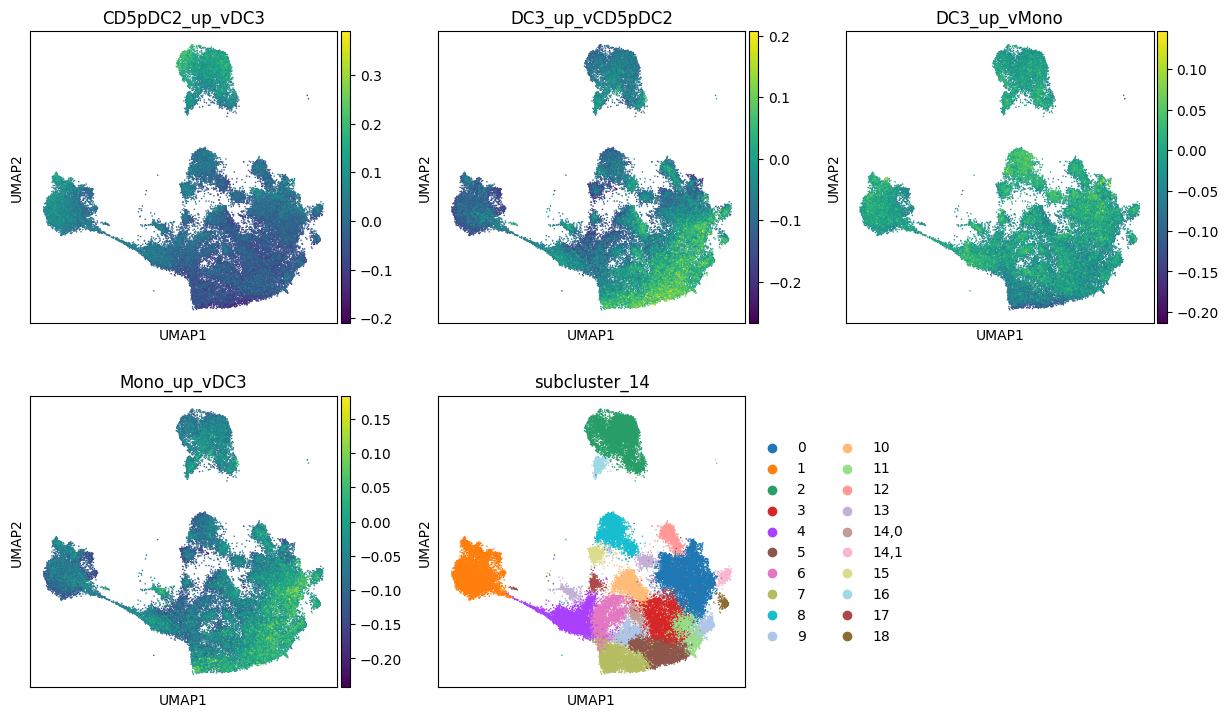

In [26]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(dc_data2, color=colour_vars, ncols=3, size=5)

In [ ]:
# overlaying dutertre et al. degs
CD5pDC2_up_vDC3 = [
CD5pDC2_up_vDC3 = [
CD5pDC2_up_vDC3 = [
CD5pDC2_up_vDC3 = [